In [17]:
import numpy as np
import pandas as pd
import hist
from hist import Hist
import awkward as ak
import json
import uproot

import matplotlib.pyplot as plt
import mplhep
plt.style.use(mplhep.style.CMS)

# Table of contents

* [Analysing the results](#results)

# Step 2: Analysing the results <a class="anchor" id="results"></a>

In [36]:
output = util.load('outfiles/Run3Summer22EE/dask_TTtoLNu2Q_short.coffea')[0]

/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Wed/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/hist/basehist.py:325: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


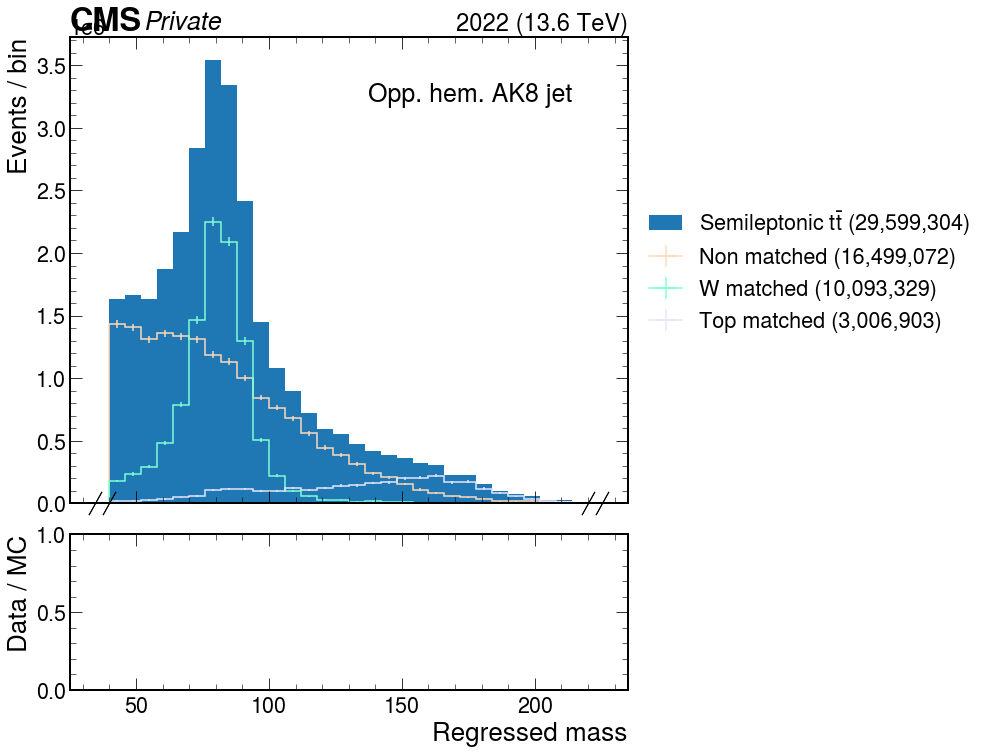

In [37]:
from coffea.hist import clopper_pearson_interval, poisson_interval
import pickle

mc = output["cutflow"]
data = output["cutflow"]

cuts = [
    'Baseline',
    'HLT_Mu50',
    'AK8 jet p$_T$ > 200',
    'MET $>$ 50 GeV',
    'Good muon',
    'Leptonic W p$_T$ > 150',
    'Opp. hem. AK8 jet',
]

# h_data = data[
#     sum,
#     :,
#     sum,
#     hist.loc('Run2022E'),
#     :,
# ]
# h_qcd = mc[
#     sum,
#     :,
#     sum,
#     hist.loc('QCD'),
#     :,
# ]
h_tt = mc[
    :,
    :,
    sum,
    hist.loc('TTtoLNu2Q'),
    :,
]

for i in range(6, 7): #h_data.axes["cut"]:

    fig, (ax, rax) = plt.subplots(
        2, 1, figsize=(10, 12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True
    )
    fig.subplots_adjust(hspace=0.1)
    ax.set_ylabel("Events / bin")
    rax.set_ylabel("Data / MC")
    rax.set_xlabel("Regressed mass")
    ax.set_xlabel(" ")
    
    hh_tt = h_tt[{"cut" : hist.loc(i)}]
#     hh_qcd = h_qcd[{"cut" : hist.loc(i)}]
    
    mplhep.histplot(
        [
            hh_tt[{"cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}],
#             hh_qcd
        ],
        ax=ax, 
        histtype="fill",
        label=[
            r"Semileptonic $t\bar{t}$" + f" ({hh_tt.sum().value:,.0f})",
#             f"QCD ({hh_qcd.sum().value:,.0f})"
        ],
        stack=True,
        sort="y_r",
        color=[
            "#1f77b4",
#             "whitesmoke"
        ],
        edgecolor="black",
    )
    
    mplhep.histplot(
        [
            hh_tt[{"cat" : hist.loc(3)}],
            hh_tt[{"cat" : hist.loc(2)}],
            hh_tt[{"cat" : hist.loc(1)}],
        ],
        ax=ax,
        label=[
            "Non matched ({0:,.0f})".format(hh_tt[{"cat" : hist.loc(3)}].sum().value),
            "W matched ({0:,.0f})".format(hh_tt[{"cat" : hist.loc(2)}].sum().value),
            "Top matched ({0:,.0f})".format(hh_tt[{"cat" : hist.loc(1)}].sum().value),
        ],
        color=["peachpuff","aquamarine","lavender"]
    )
    
#     hh_data = h_data[{"cut" : hist.loc(i)}]
    
#     mplhep.histplot(
#         hh_data, 
#         ax=ax, 
#         histtype="errorbar",
#         xerr=True,
#         c="black",
#         label=f"Data ({hh_data.sum().value:,.0f})"
#     )
    
#     centers = hh_data.axes[0].centers
#     sumw_num, sumw2_num = hh_data.values(), hh_data.variances()
#     sumw_denom, sumw2_denom = hh_tt[{"cat" : sum}].values(), hh_tt[{"cat" : sum}].variances()
    
#     rsumw = sumw_num / np.maximum(1, sumw_denom)
#     rsumw_unc = poisson_interval(
#         rsumw,
#         sumw2_num / sumw_denom**2
#     )
    
#     data_err_opts = {
#         'linestyle': 'none',
#         'marker': '.',
#         'markersize': 10.,
#         'color': 'k',
#         'elinewidth': 1,
#     }
    
#     rax.errorbar(
#         centers,
#         rsumw,
#         xerr=centers[1]-centers[0],
#         yerr=rsumw_unc,
#         **data_err_opts,
#     )
    
    rax.axhline(1, color='gray',ls='--')
    
    plt.text(0.9, 0.85, f"{cuts[i]}",
                fontsize=25,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )

    mplhep.cms.label(
            ax=ax, 
            data=True, 
            fontsize=25,
            label="Private",
            year=2022,
#             lumi=f"{lumis[era]/1000:.2f}",
            com=13.6,
        )
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Hist(
  IntCategory([-2.14748e+09, 2, 3, 1], growth=True, name='cat', label='Category'),
  Regular(30, 40, 220, name='reg', label='Regressed mass'),
  Variable([-0.1, 0.816719, 0.954482, 0.986413, 1.1], name='pn_Hbb', label='$H\\rightarrow b\\bar{b}$ vs QCD discriminator'),
  IntCategory([0, 1, 2, 3, 4, 5, 6], growth=True, name='cut', label='Cut Idx'),
  storage=Weight()) # Sum: WeightedSum(value=3.40995e+08, variance=2.07751e+11) (WeightedSum(value=1.51393e+11, variance=9.08569e+13) with flow)


/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Wed/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/hist/basehist.py:325: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


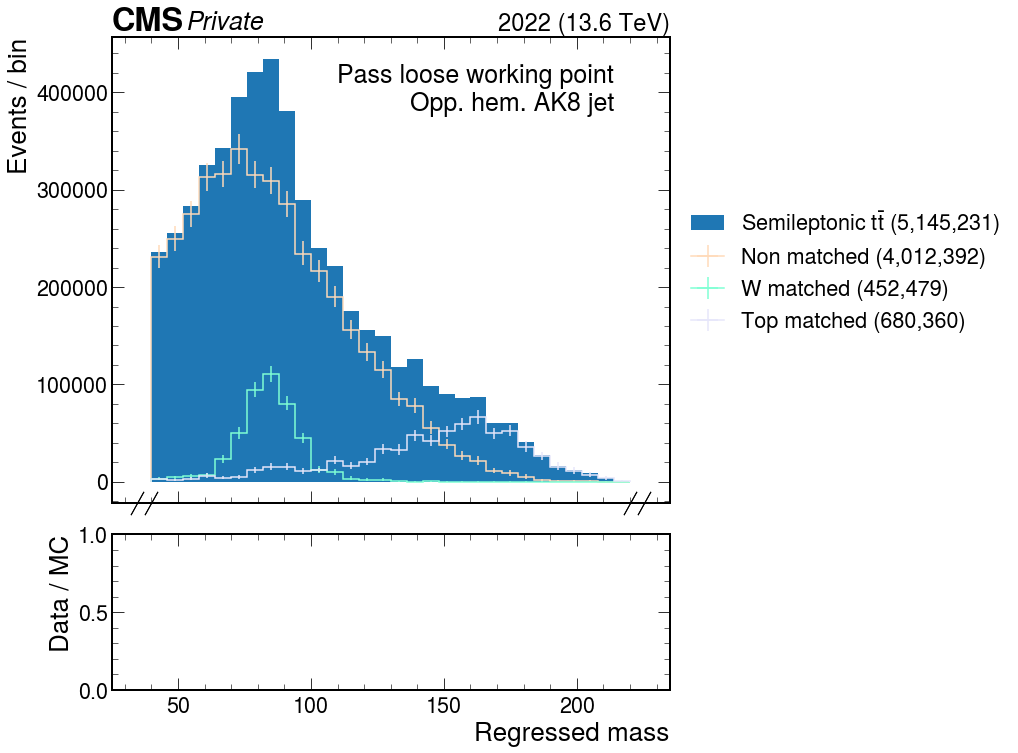

In [46]:
from coffea.hist import clopper_pearson_interval, poisson_interval
import pickle

mc = output["cutflow"]
data = output["cutflow"]

cuts = [
    'Baseline',
    'HLT_Mu50',
    'AK8 jet p$_T$ > 200',
    'MET $>$ 50 GeV',
    'Good muon',
    'Leptonic W p$_T$ > 150',
    'Opp. hem. AK8 jet',
]

wps = {
    1 : "loose",
    2 : "medium",
    3 : "tight",
}

# h_data = data[
#     sum,
#     :,
#     sum,
#     hist.loc('Run2022E'),
#     :,
# ]
# h_qcd = mc[
#     sum,
#     :,
#     sum,
#     hist.loc('QCD'),
#     :,
# ]
h_tt = mc[
    :,
    :,
    :,
    hist.loc('TTtoLNu2Q'),
    :,
]

wp = 1

for i in range(6, 7): #h_data.axes["cut"]:
    
    for region in [(f"Pass {wps[wp]} working point")]: #, (f"Pass {wps[wp]} working point")]:

        fig, (ax, rax) = plt.subplots(
            2, 1, figsize=(10, 12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True
        )
        fig.subplots_adjust(hspace=0.1)
        ax.set_ylabel("Events / bin")
        rax.set_ylabel("Data / MC")
        rax.set_xlabel("Regressed mass")
        ax.set_xlabel(" ")
        
        print(h_tt)

        if "Pass" in region:
            hh_tt = h_tt[{"cut" : hist.loc(i)}][:, :, wp:4:sum]
        else:
            hh_tt = h_tt[{"cut" : hist.loc(i)}][:, :, 0:wp:sum]
    #     hh_qcd = h_qcd[{"cut" : hist.loc(i)}]

        mplhep.histplot(
            [
                hh_tt[{"cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}],
    #             hh_qcd
            ],
            ax=ax, 
            histtype="fill",
            label=[
                r"Semileptonic $t\bar{t}$" + f" ({hh_tt.sum().value:,.0f})",
    #             f"QCD ({hh_qcd.sum().value:,.0f})"
            ],
            stack=True,
            sort="y_r",
            color=[
                "#1f77b4",
    #             "whitesmoke"
            ],
            edgecolor="black",
        )

        mplhep.histplot(
            [
                hh_tt[{"cat" : hist.loc(3)}],
                hh_tt[{"cat" : hist.loc(2)}],
                hh_tt[{"cat" : hist.loc(1)}],
            ],
            ax=ax,
            label=[
                "Non matched ({0:,.0f})".format(hh_tt[{"cat" : hist.loc(3)}].sum().value),
                "W matched ({0:,.0f})".format(hh_tt[{"cat" : hist.loc(2)}].sum().value),
                "Top matched ({0:,.0f})".format(hh_tt[{"cat" : hist.loc(1)}].sum().value),
            ],
            color=["peachpuff","aquamarine","lavender"]
        )

    #     hh_data = h_data[{"cut" : hist.loc(i)}]

    #     mplhep.histplot(
    #         hh_data, 
    #         ax=ax, 
    #         histtype="errorbar",
    #         xerr=True,
    #         c="black",
    #         label=f"Data ({hh_data.sum().value:,.0f})"
    #     )

    #     centers = hh_data.axes[0].centers
    #     sumw_num, sumw2_num = hh_data.values(), hh_data.variances()
    #     sumw_denom, sumw2_denom = hh_tt[{"cat" : sum}].values(), hh_tt[{"cat" : sum}].variances()

    #     rsumw = sumw_num / np.maximum(1, sumw_denom)
    #     rsumw_unc = poisson_interval(
    #         rsumw,
    #         sumw2_num / sumw_denom**2
    #     )

    #     data_err_opts = {
    #         'linestyle': 'none',
    #         'marker': '.',
    #         'markersize': 10.,
    #         'color': 'k',
    #         'elinewidth': 1,
    #     }

    #     rax.errorbar(
    #         centers,
    #         rsumw,
    #         xerr=centers[1]-centers[0],
    #         yerr=rsumw_unc,
    #         **data_err_opts,
    #     )

        rax.axhline(1, color='gray',ls='--')

        plt.text(0.9, 0.83, f"{region}" + "\n" + f"{cuts[i]}",
                    fontsize=25,
                    horizontalalignment='right',
                    verticalalignment='bottom',
                    transform=ax.transAxes
                   )

        mplhep.cms.label(
                ax=ax, 
                data=True, 
                fontsize=25,
                label="Private",
                year=2022,
    #             lumi=f"{lumis[era]/1000:.2f}",
                com=13.6,
            )

        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))